In [19]:
import numpy as np
import math
import seaborn as sns
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

timesteps,temp,k,p,tot,lx,ly,lz,ptot,px,py,pz,npx,npy,npz,memp,interaction \
= [], [], [], [], [], [], [], [], [], [],[], [], [], [], [], [], []

with open("/Users/ray/Downloads/newtest/endocytosis_time/sample6/log.lammps") as f:
    for line in f:
        cols = line.split()
        #change the number for how many cols of data
        if len(cols)==17 and cols[0].isnumeric():
            if int(cols[0])>=2000*0:
                timesteps.append(int(cols[0]))
                temp.append(float(cols[1]))
                k.append(float(cols[2]))
                p.append(float(cols[3]))
                tot.append(float(cols[4]))
                lx.append(float(cols[5]))
                ly.append(float(cols[6]))
                lz.append(float(cols[7]))
                ptot.append(float(cols[8]))
                px.append(float(cols[9]))
                py.append(float(cols[10]))
                pz.append(float(cols[11]))
                npx.append(float(cols[12]))
                npy.append(float(cols[13]))
                npz.append(float(cols[14]))
                memp.append(float(cols[15]))
                interaction.append(float(cols[16]))


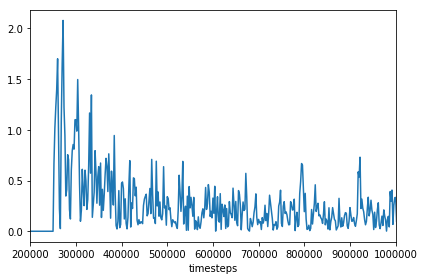

In [20]:
rmsd = [0]
for i in range(len(npz)-1):
    dx=npx[i+1]-npx[i]
    dy=npy[i+1]-npy[i]
    dz=npz[i+1]-npz[i]
    msd = math.sqrt(dz**2)
    if msd <= 80:
        msd= msd
    else:
        msd = 0
    rmsd.append(msd)

width = 24
height = 12
plt.figure(figsize=(width, height))
fig, ax1 = plt.subplots()
ax1.plot(timesteps, rmsd)
ax1.set_xlabel('timesteps')
ax1.set_xlim(200000,1000000)
fig.tight_layout()
plt.show()


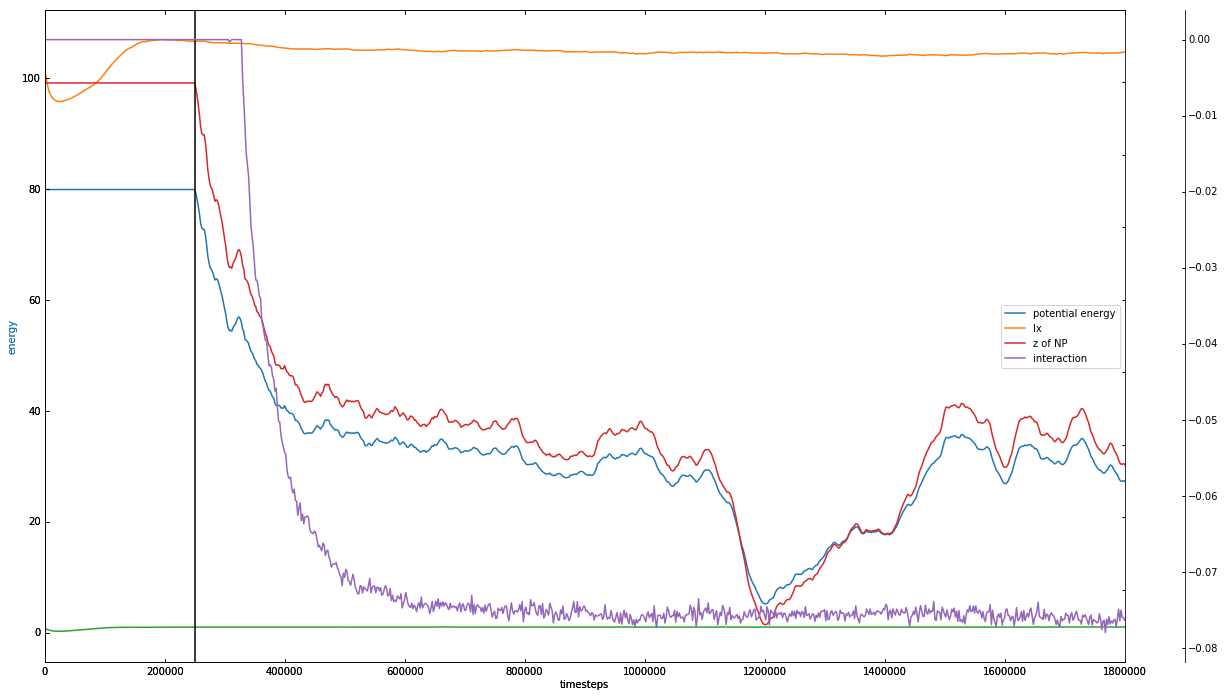

In [21]:
width = 24
height = 12
plt.figure(figsize=(width, height))
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)


par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right",
                                    axes=par2,
                                    offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlim(00000,1800000 )


host.set_xlabel("timesteps")
host.set_ylabel("energy")


p1, = host.plot(timesteps, npz, label="potential energy")
p4, = host.plot(timesteps, lx, label="lx")
p5,= host.plot(timesteps,temp)
p2, = par1.plot(timesteps, npz, label="z of NP")
par1.set_yticks(np.arange(0, 100, 10))
#par1.axhspan(40, 60)
par1.axvline(x=250000,color= 'black')
p3, = par2.plot(timesteps, interaction, label="interaction")


host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

plt.draw()
plt.show()



217
21.004712479262672
20.981620825361514
0.023091653901158082


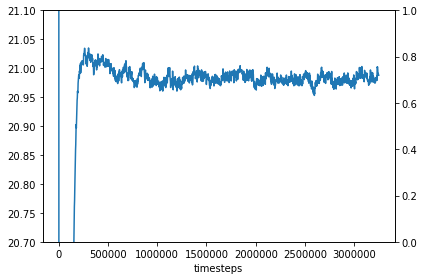

In [40]:
#timesteps,temp,k,p,tot,lx,ly,lz,ptot,px,py,pz,npx,npy,npz,memp,interaction
memp1=[]
memp2=[]
for i in range(len(memp)):
    if timesteps[i]>250000 and timesteps[i]<685000:#(250000,785000)
        memp1.append(memp[i])
    elif timesteps[i]>1200000 and timesteps[i]<3000000:
        memp2.append(memp[i])
        
print(len(memp1))
print(stat.mean(memp1))
print(stat.mean(memp2))
print(stat.mean(memp1)-stat.mean(memp2))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#ax1.set_xlim(200000,3000000)
ax1.set_ylim(20.7,21.1)
ax1.plot(timesteps, memp)
#ax2.plot(timesteps, ptot, 'r.')
ax1.set_xlabel('timesteps')
fig.tight_layout()
plt.show()


3.9544188276471277
3.185238074391182
The diffusion coefficient: 0.03295349023039273


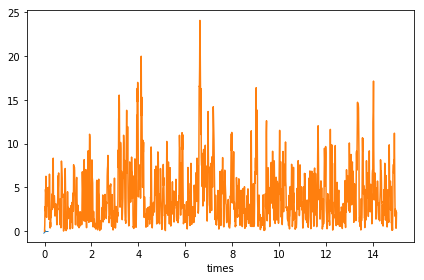

In [3]:
import statistics as stat
import math
time, npcomx, npcomy, npcomz, npmsdx, npmsdy, npmsdz, npmsd= [], [], [], [], [], [], [], []

with open("/Users/ray/Downloads/sphere/log.lammps") as f:
    for line in f:
        cols = line.split()
        #change the number for how many cols of data
        if len(cols)==19 and cols[0].isnumeric():
            if int(cols[0])>=2000*0:
                time.append(float(cols[0])/(200000))
                npcomx.append(float(cols[12]))
                npcomy.append(float(cols[13]))
                npcomz.append(float(cols[14]))
                npmsdx.append(float(cols[15]))
                npmsdy.append(float(cols[16]))
                npmsdz.append(float(cols[17]))
                npmsd.append(float(cols[18]))

npmsdfcom = [0]

for i in range(len(npcomz)-1):
    dx=abs(npcomx[i+1]-npcomx[i])
    dy=abs(npcomy[i+1]-npcomy[i])
    dz=abs(npcomz[i+1]-npcomz[i])
    if dx > 50:
        dx =100-dx
    else:
        dx=dx
    if dy > 50:
        dy =100-dy
    else:
        dy=dy
    if dz > 50:
        dz=100-dz
    else:
        dz=dz
    msdfcom = dx**2+dy**2+dz**2
    npmsdfcom.append(msdfcom)

cmsd=stat.mean(npmsdfcom)   
print(cmsd) 
print(stat.stdev(npmsdfcom))
diff=cmsd/(6*20)
print("The diffusion coefficient:", diff)
width = 24
height = 12
plt.figure(figsize=(width, height))
fig, ax1 = plt.subplots()
#ax1.plot(time, npmsdx)
ax1.plot(diff,'4')
ax1.plot(time, npmsdfcom)
ax1.set_xlabel('times')
fig.tight_layout()
plt.show()
